  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 8s.
[0.88022724 1.09123783 0.63592452 0.36276714 0.78460181 0.98488578
 0.56603887 0.38       1.06451867 0.94042544 0.67911707 0.39849718
 0.78409183 0.58549125 0.36055513 0.60827625 1.09123783 0.85440037
 0.54147945 0.63150614 0.82873397 0.56320511 0.52038447 0.88022724
 1.06451867 0.93230896 0.56320511 0.36055513 0.42755117 0.35608988
 0.44407207 0.65513357 0.85440037 1.01133575 1.11803399 1.06451867
 1.09123783 1.11803399 1.09123783 1.06451867 1.01133575 1.11803399
 0.98488578 0.56320511 0.42755117 0.3671512  0.41231056 0.36055513
 0.44407207 0.98488578 1.09123783 0.88022724 0.44407207 0.56320511
 0.52038447 0.67911707 0.38626416 1.01133575 1.03788246 0.70342022
 0.36055513 0.73402997 0.88022724 0.36823905 0.56320511 1.01133575
 1.06451867 0.54369109 0.50318983 0.88022724 0.78460181 0.35608988
 0.67911707 1.07349895 0.82873397]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 9s.
Best infidelity after 0 BOULDER OPAL optimization steps: 0.33045423283716613


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_closed_loop_optimization_step has started.
Your task calculate_closed_loop_optimization_step has completed in 19s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements is currently in a queue waiting to be processed.
Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 11s.
Best infidelity after 1 BOULDER OPAL optimization step: 0.33045423283716613


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_closed_loop_optimization_step has started.
Your task calculate_closed_loop_optimization_step has completed in 19s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 7s.
Best infidelity after 2 BOULDER OPAL optimization steps: 0.3168595903550972


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_closed_loop_optimization_step has started.
Your task calculate_closed_loop_optimization_step has completed in 36s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
Best infidelity after 3 BOULDER OPAL optimization steps: 0.3168595903550972


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_closed_loop_optimization_step has started.
Your task calculate_closed_loop_optimization_step has completed in 49s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.
Best infidelity after 4 BOULDER OPAL optimization steps: 0.3013303834663873


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_closed_loop_optimization_step has started.
Your task calculate_closed_loop_optimization_step has completed in 60s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 8s.
Infidelity: 0.3013303834663873


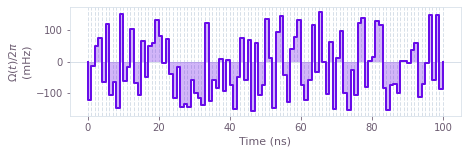

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


### this cell deals with initialization ########

import matplotlib.pyplot as plt
import numpy as np
from qctrlvisualizer import get_qctrl_style, plot_controls

from qctrl import Qctrl

import json
from io import StringIO


plt.style.use(get_qctrl_style())

# Start a session with the API.
qctrl = Qctrl(email='apteanuj@uchicago.edu', password='nsWvXh4mFCj68x2')


# Define standard deviation of the errors in the experimental results.
sigma = 0.01


segment_count = 100
# duration in nanoseconds
duration = 100 # ns
# no. of shots in each round
shot_count= 50

# Define the number of test points obtained per run.
test_point_count = 75

###############

def costfun(controls):
    experiment_results = qctrl.functions.calculate_qchack_measurements(
        controls=controls,
        shot_count=test_point_count,)
    measurements = experiment_results.measurements     ### actual measurements occur here
    ### let us obtain an array of probabilities for each test_point ###
    cost=np.zeros(test_point_count)
    for j in range(test_point_count):
        #### probabilities are calculated here
        p0 = measurements[j].count(0) / shot_count
        p1 = measurements[j].count(1) / shot_count
        p2 = measurements[j].count(2) / shot_count
        ##cost[j]=cost[j]+np.sqrt(p0**2+(1-p1)**2+p2**2)
        cost[j]=cost[j]+np.sqrt((0.5-p0)**2+(0.5-p1)**2+p2**2)  
    return(cost)



# In[22]:


parameter_set = (
        1.0
        * (np.linspace(-1, 1, test_point_count)[:, None])
        * np.ones((test_point_count, segment_count))
)


####### we are trying to get a test_point_count worth of controls from a parameter_set  ###

def controlsfn(param_set):
    controls = []
    for k in range(test_point_count):
        # Create a random string of complex numbers for each controls.
        values = param_set[k]
        controls.append({"duration": duration, "values": (1+1j)*values/np.sqrt(2)})
    return(controls)

def costfn(param_set):
    controlset=controlsfn(param_set=param_set)
    return(costfun(controlset))

print(costfn(parameter_set))


# In[23]:



# Define standard deviation of the errors in the experimental results.
sigma = 0.01
# Obtain the cost of initial experimental results.
exp_results = costfn(parameter_set)


length_scale_bound = qctrl.types.closed_loop_optimization_step.BoxConstraint(
    lower_bound=1e-5,
    upper_bound=1e5,
)
bound = qctrl.types.closed_loop_optimization_step.BoxConstraint(
    lower_bound=-1,
    upper_bound=1,
)
initializer = qctrl.types.closed_loop_optimization_step.GaussianProcessInitializer(
    length_scale_bounds=[length_scale_bound] * segment_count,
    bounds=[bound] * segment_count,
    rng_seed=0,
)

# Define state object for the closed-loop optimization.
optimizer = qctrl.types.closed_loop_optimization_step.Optimizer(
    gaussian_process_initializer=initializer,
)


best_cost, best_controls = min(
    zip(exp_results, parameter_set), key=lambda params: params[0]
)
optimization_count = 0

# Run the optimization loop until the cost (infidelity) is sufficiently small.
while optimization_count < 5:
    # Print the current best cost.
    optimization_steps = (
        "optimization step" if optimization_count == 1 else "optimization steps"
    )
    print(
        f"Best infidelity after {optimization_count} BOULDER OPAL {optimization_steps}: {best_cost}"
    )

    # Organize the experiment results into the proper input format.
    results = [
        qctrl.types.closed_loop_optimization_step.CostFunctionResult(
            parameters=list(parameters),
            cost=cost,
            cost_uncertainty=sigma,
        )
        for parameters, cost in zip(parameter_set, exp_results)
    ]

    # Call the automated closed-loop optimizer and obtain the next set of test points.
    optimization_result = qctrl.functions.calculate_closed_loop_optimization_step(
        optimizer=optimizer,
        results=results,
        test_point_count=test_point_count,
    )
    optimization_count += 1

    # Organize the data returned by the automated closed-loop optimizer.
    parameter_set = np.array(
        [test_point.parameters for test_point in optimization_result.test_points]
    )
    optimizer = qctrl.types.closed_loop_optimization_step.Optimizer(
        state=optimization_result.state
    )

    # Obtain experiment results that the automated closed-loop optimizer requested.
    experiment_results = costfn(parameter_set)

    # Record the best results after this round of experiments.
    cost, controls = min(
        zip(experiment_results, parameter_set), key=lambda params: params[0]
    )
    if cost < best_cost:
        best_cost = cost
        best_controls = controls

# Print final best cost.
print(f"Infidelity: {best_cost}")


# Plot controls that correspond to the best cost.
plot_controls(
    figure=plt.figure(),
    controls={
        r"$\Omega(t)$": [
            {"duration": duration*10**(-9)/ len(best_controls), "value": value}
            for value in best_controls
        ]
    },
)




In [2]:
finalcontrolsarr=[]

for value in best_controls:
     finalcontrolsarr.append({"duration": duration / len(best_controls), "value": value*(1+1j)/np.sqrt(2)})


print(finalcontrolsarr)

def controlsfromparam(best):
    controls = []
    values = best_controls
    controls.append({"duration": duration, "values": (1+1j)*values/np.sqrt(2)})
    return(controls)

end_test = qctrl.functions.calculate_qchack_measurements(
    controls=controlsfromparam(best_controls),
    shot_count=100,
)

finmeasurements = end_test.measurements

print(finmeasurements)

p0 = finmeasurements[0].count(0) / 100
p1 = finmeasurements[0].count(1) / 100
p2 = finmeasurements[0].count(2) / 100
print(f"P(|0>) = {p0:.2f}, P(|1>) = {p1:.2f}, P(|2>) = {p2:.2f}")


[{'duration': 1.0, 'value': (-0.5402004596437417-0.5402004596437417j)}, {'duration': 1.0, 'value': (-0.061185422507887034-0.061185422507887034j)}, {'duration': 1.0, 'value': (0.22757052289313937+0.22757052289313937j)}, {'duration': 1.0, 'value': (0.3308205768031779+0.3308205768031779j)}, {'duration': 1.0, 'value': (-0.2828757856063637-0.2828757856063637j)}, {'duration': 1.0, 'value': (0.53202263693222+0.53202263693222j)}, {'duration': 1.0, 'value': (-0.47338308356801034-0.47338308356801034j)}, {'duration': 1.0, 'value': (-0.29159448459324155-0.29159448459324155j)}, {'duration': 1.0, 'value': (-0.6573367778409425-0.6573367778409425j)}, {'duration': 1.0, 'value': (0.6699951593442028+0.6699951593442028j)}, {'duration': 1.0, 'value': (-0.27250476079029984-0.27250476079029984j)}, {'duration': 1.0, 'value': (-0.06752159498908882-0.06752159498908882j)}, {'duration': 1.0, 'value': (0.46383300683184864+0.46383300683184864j)}, {'duration': 1.0, 'value': (-0.2989934080467897-0.2989934080467897j)}

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 6s.
[[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1]]
P(|0>) = 0.51, P(|1>) = 0.48, P(|2>) = 0.01


In [6]:
import jsonpickle.ext.numpy as jsonpickle_numpy
import jsonpickle
import numpy as np

jsonpickle_numpy.register_handlers()
values = best_controls
#not_control = {"duration": duration, "value": (1+1j)*values/np.sqrt(2)}
#json_not_control = jsonpickle.encode(not_control)
#with open("not_gate_pulse.json", "w") as file:
#       file.write(json_not_control)

    
h_control = {"duration": duration, "value": (1+1j)*values/np.sqrt(2)}
json_h_control = jsonpickle.encode(h_control)
with open("h_gate_pulse.json", "w") as file:
       file.write(json_h_control)